<a href="https://colab.research.google.com/github/ajit04022000/MACHINE_LEARNING/blob/main/9_18)Ensemble_Learning_Bagging_Bosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baging techinique 

###classifaction

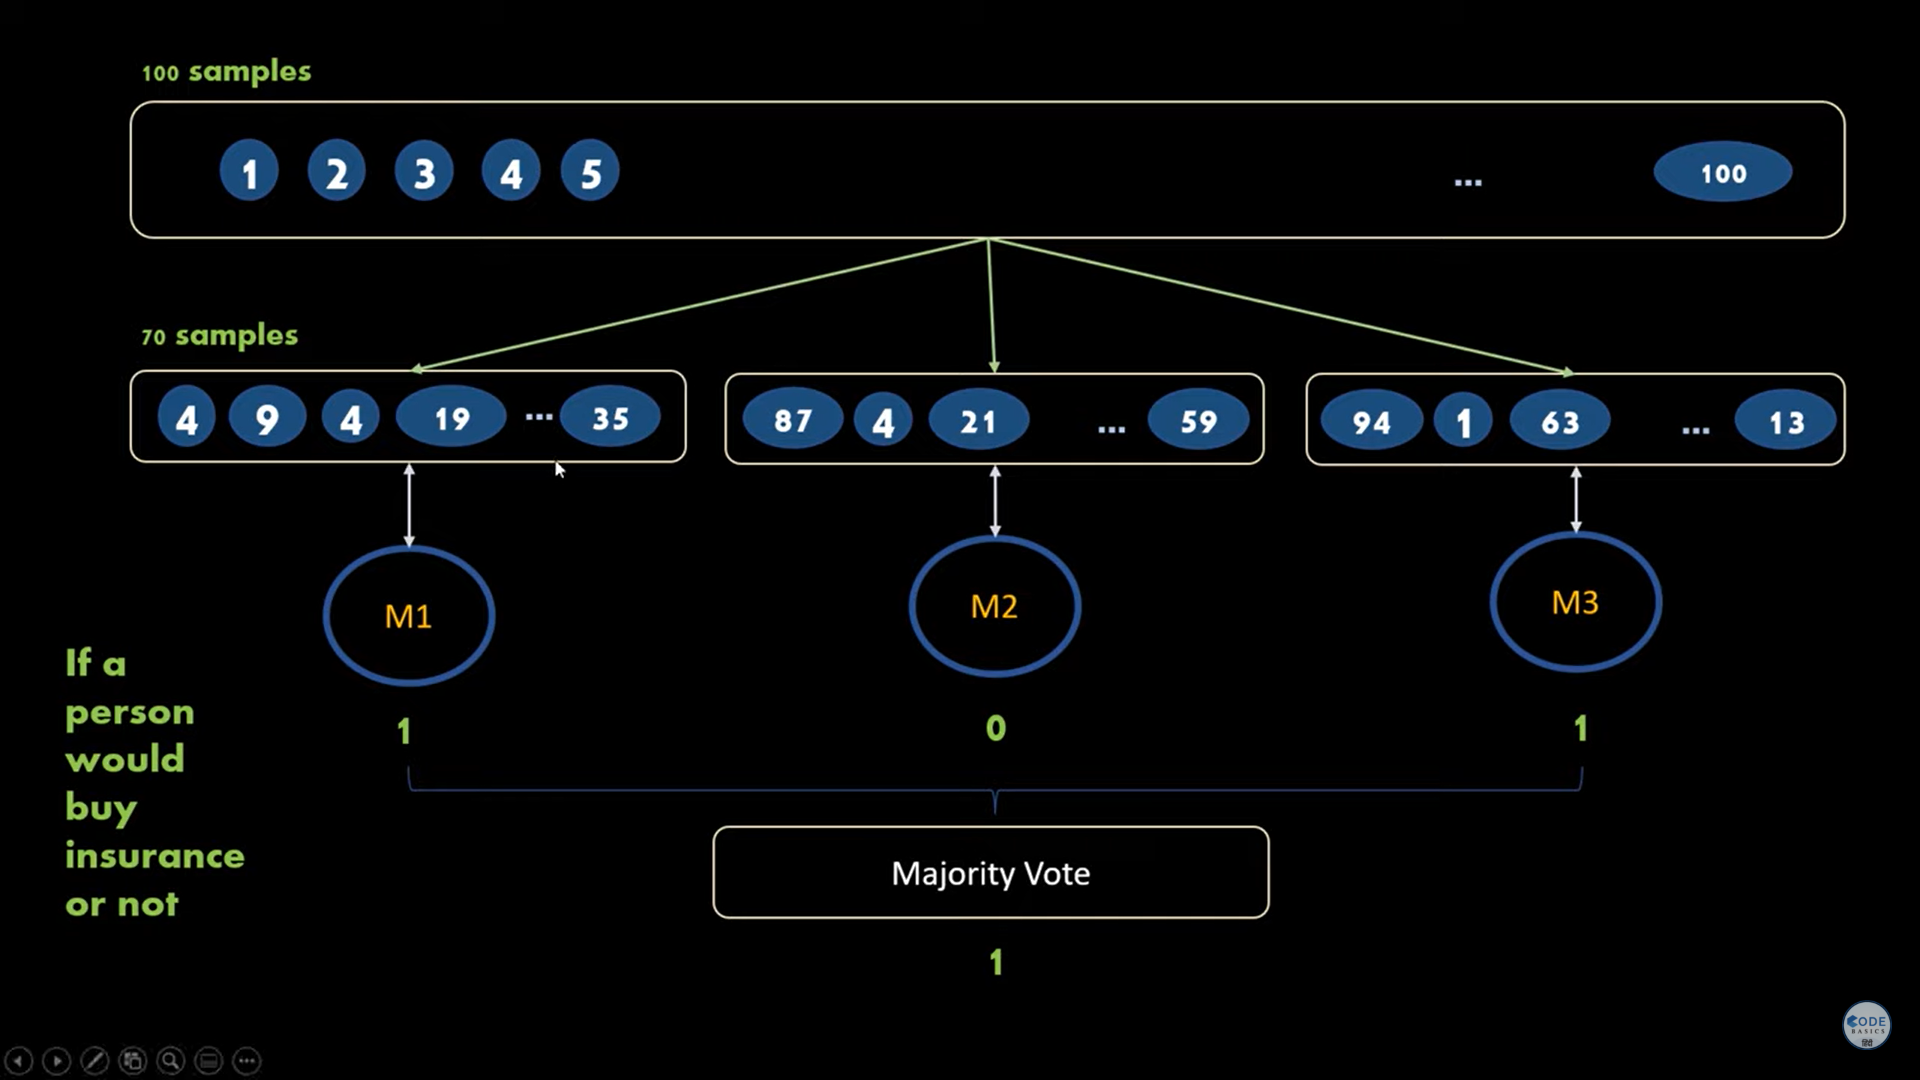

###regression

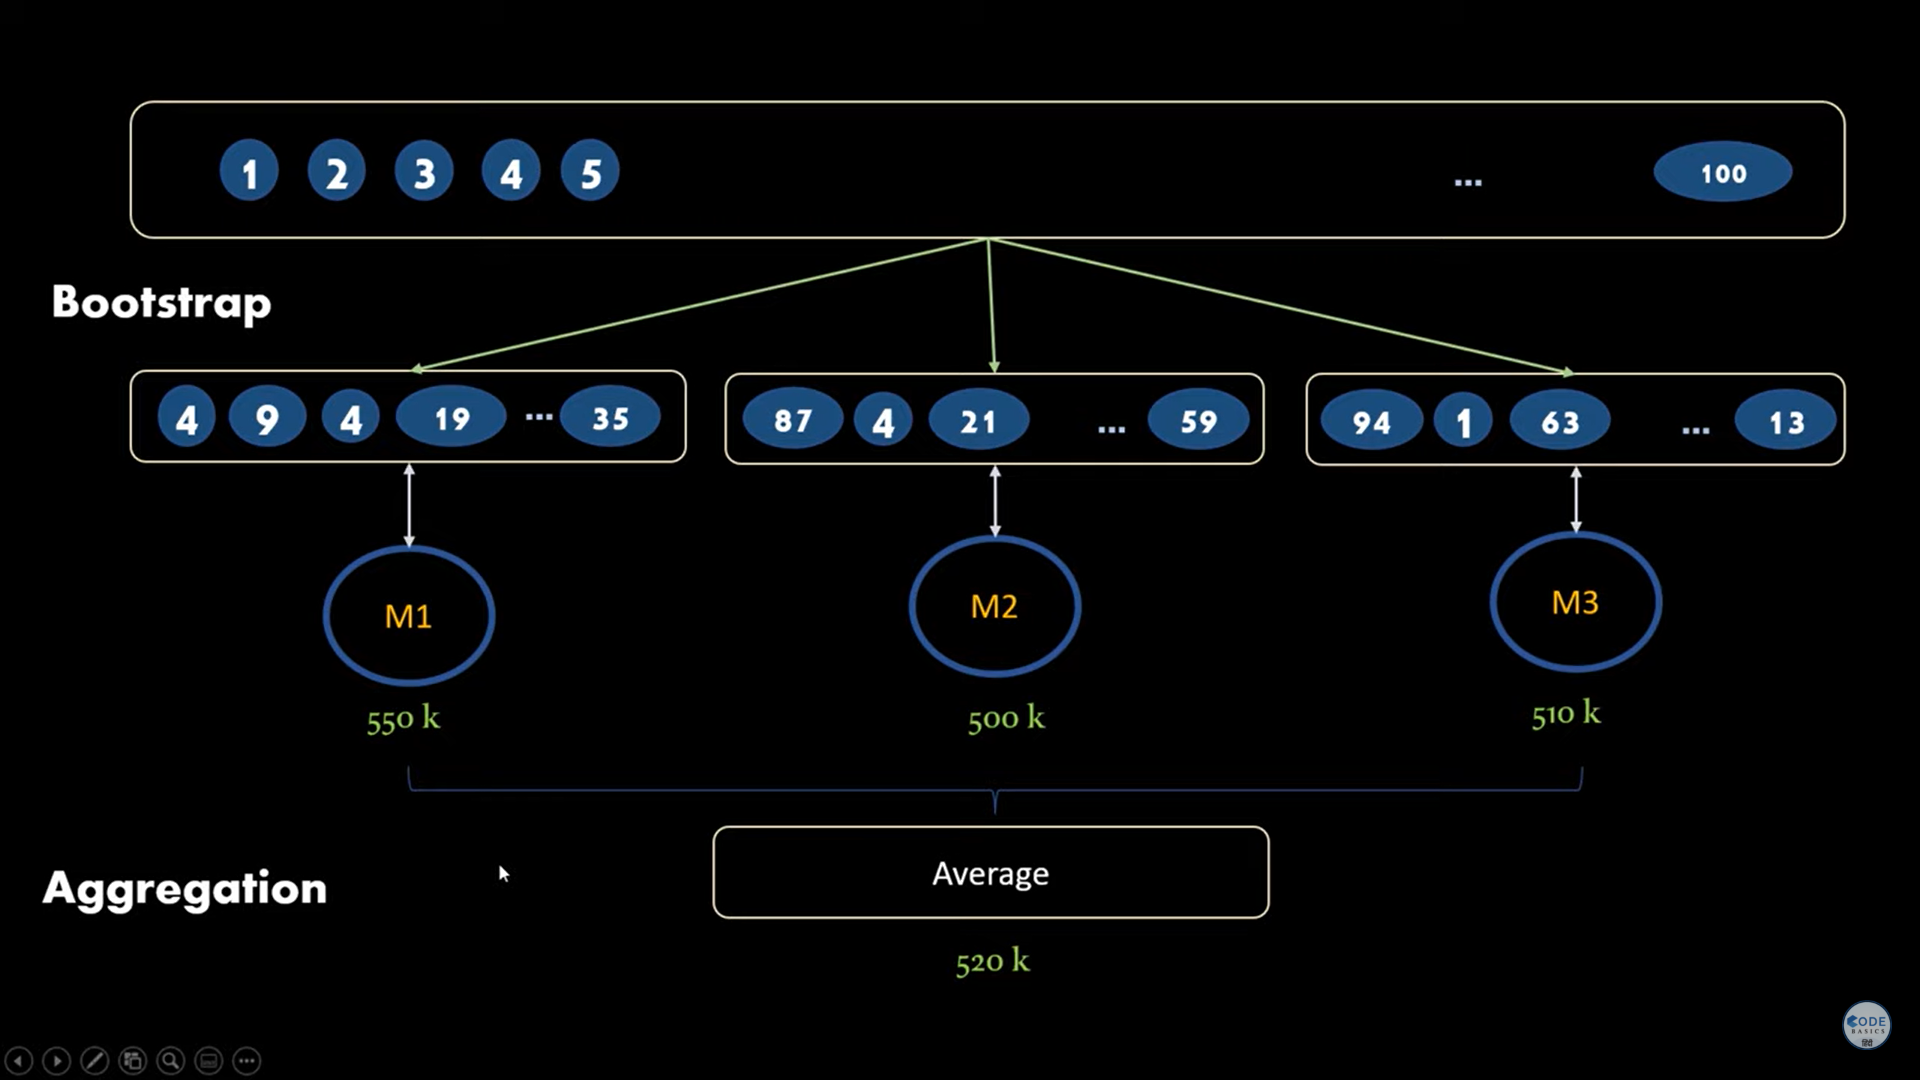

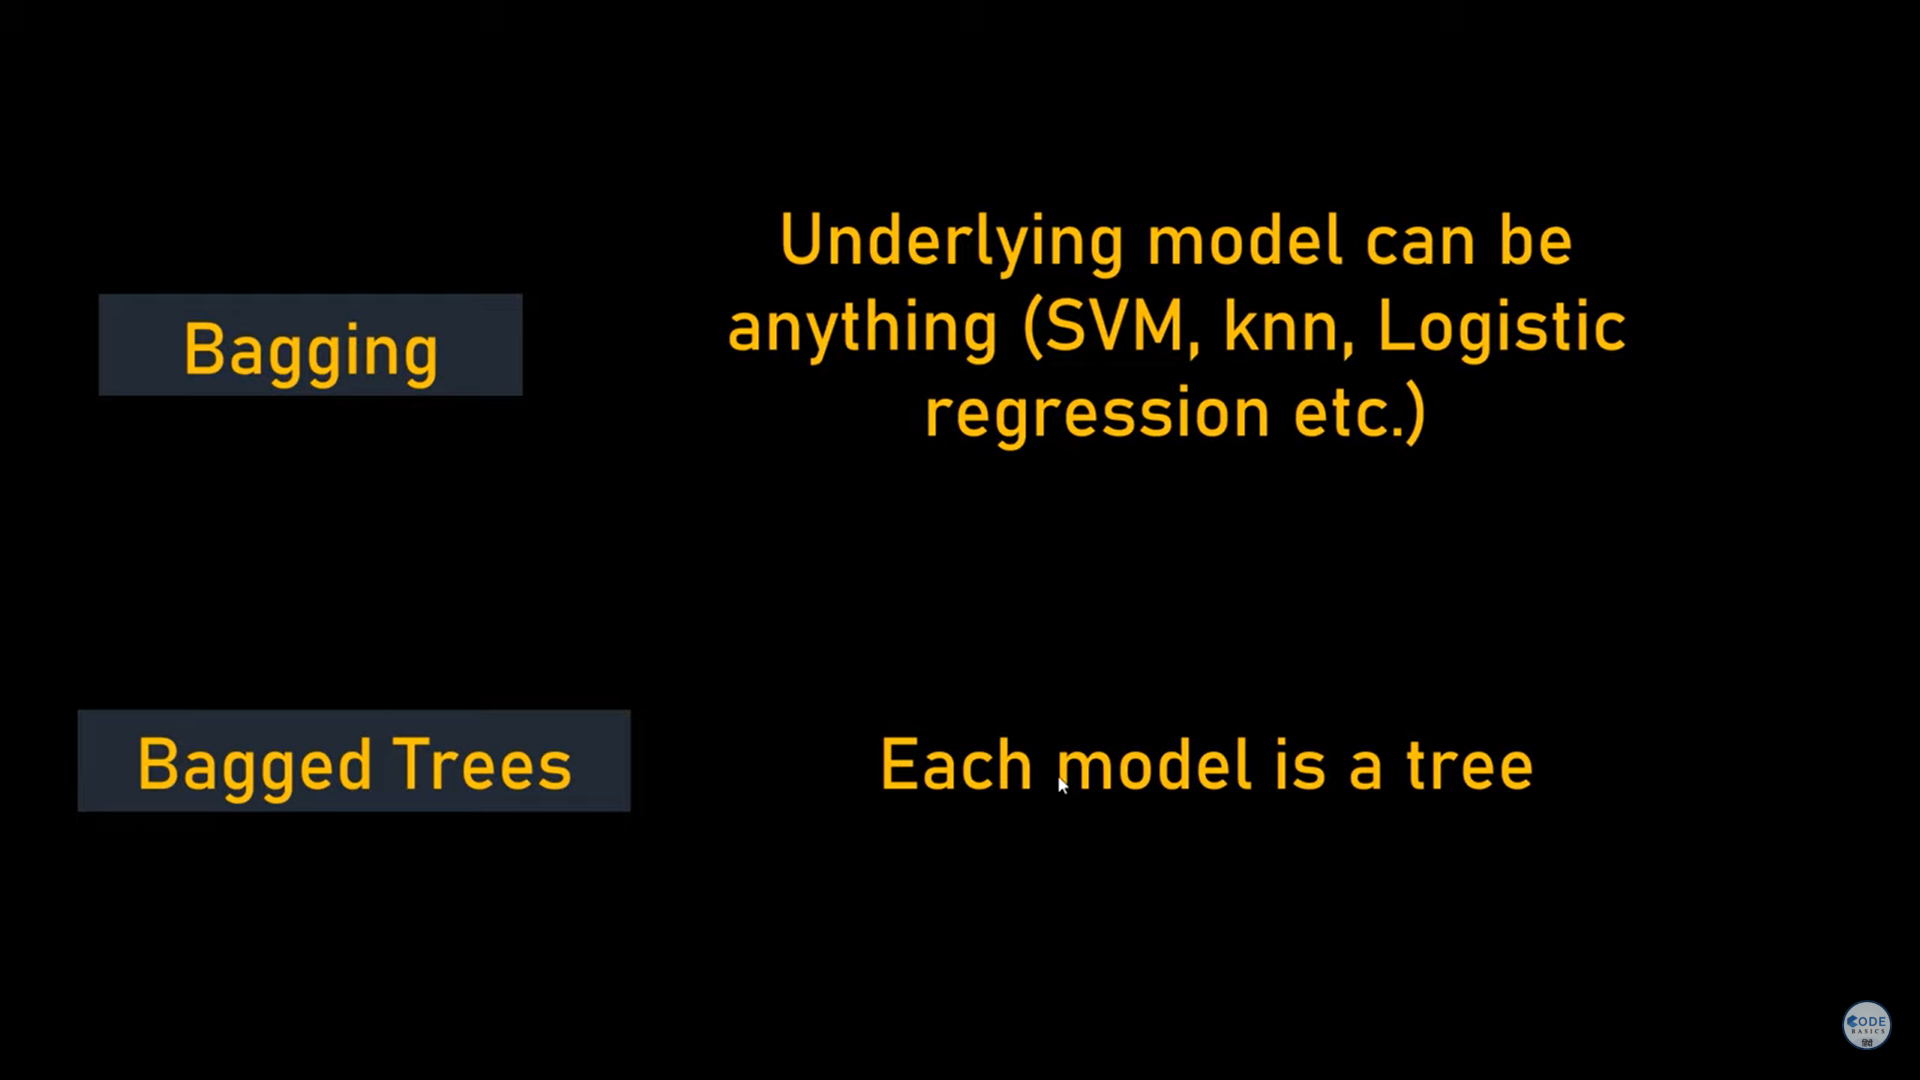

### RandomForest baging (decision tree)

in this case we make subset of (X)variable as well as output(y) 

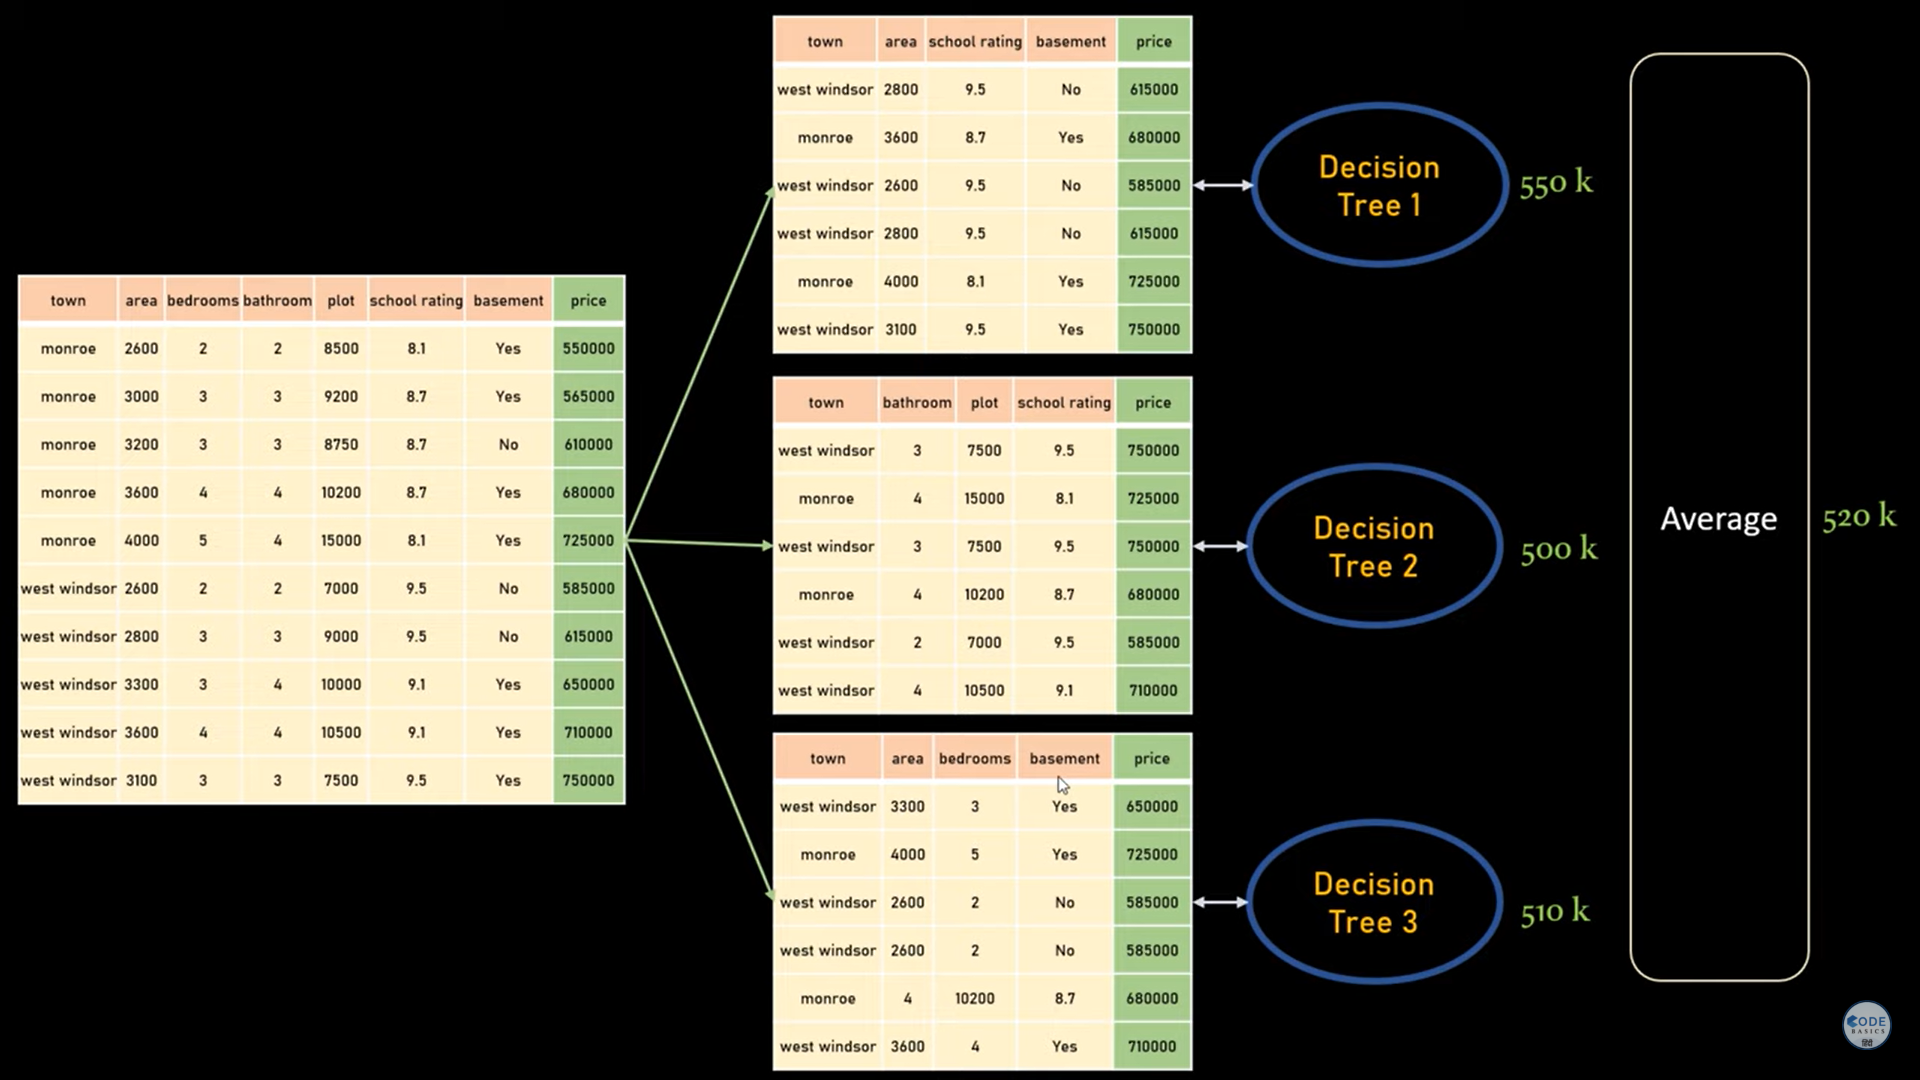

Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset:  [link text](https://www.kaggle.com/fedesoriano/heart-failure-prediction))

* Load heart disease dataset in pandas dataframe
* Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
* Convert text columns to numbers using label encoding and one hot encoding
* Apply scaling
* Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
* Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
* Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/19_Bagging/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum().sort_values(ascending = True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
268/500

0.536

In [ ]:
X = df.drop('Outcome',axis=1,)
y = df.Outcome

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify = y,random_state=30)

In [ ]:
X_train.shape

(576, 8)

In [ ]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
scores

array([0.67532468, 0.64935065, 0.70779221, 0.81045752, 0.7124183 ])

In [ ]:
scores.mean()

0.7110686698921993

In [ ]:
## importing bagging
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score = True,
    random_state=0  
)

bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.7534722222222222

In [ ]:
bag_model.score(X_test,y_test)

0.7916666666666666

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score = True,
    random_state=0  
)
scores = cross_val_score(bag_model,X,y,cv=5)
scores

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [ ]:
scores.mean()

0.7578728461081402

In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50),X,y,cv=5)
scores.mean()

0.7591800356506239